# estudo sobre arvores de decisão 
Esse notebook tem como obijetivo entender e aplicar modelos de clasificação usando arvores de decisão. 

## import das bibliotecas 


In [1]:
import pandas as pd 
import numpy as np 
import category_encoders as  ce 
import matplotlib.pyplot as plt

### carregando df 

In [2]:
path = 'archive/penguins_lter.csv'
df = pd.read_csv(path)
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [4]:
# aqui eu checo quantos valores unicos existem por coluna 
for col in df: 
    print('{} : {}'.format(col, len(df[col].unique())))

studyName : 3
Sample Number : 152
Species : 3
Region : 1
Island : 3
Stage : 1
Individual ID : 190
Clutch Completion : 2
Date Egg : 50
Culmen Length (mm) : 165
Culmen Depth (mm) : 81
Flipper Length (mm) : 56
Body Mass (g) : 95
Sex : 4
Delta 15 N (o/oo) : 331
Delta 13 C (o/oo) : 332
Comments : 8


considerando que os campos Stage e Region não trasem informação para o nosso modelo, não vamos mantelo nos nossos dados. 
alem disso, os campos 'Sample Number','studyName','Comments' são campos de id ou com informaçoes individialisadas, quan não vão nos trazer mias informação

In [5]:
df = df.drop(['Stage','Region','Individual ID','Sample Number','studyName','Comments'], axis=1)
df.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


## separando o dataset em treino e test 
para treinarmos o modelo, precisamos dividir os dados em dados de treino e dados de teste, para isso vamos utilizar a ferrameta do proprio sklerne para dividir os dados 

In [6]:
from sklearn.model_selection import train_test_split

como nosso objetivo é prever a a raça dos pinguins, vamos separar a coluna Specis como y, nosso dado obijetivo do restante x que vão ser os dados utilizados para fazer nossa previsão

In [7]:
x = df.drop(['Species'], axis=1)
y = df['Species']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(
x,y,test_size=0.33,random_state=42)

In [9]:
x_test.reset_index(drop=True)
y_test.reset_index(drop=True)
x_test.head()

,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
194,Dream,Yes,11/14/08,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
157,Dream,Yes,11/21/07,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
225,Biscoe,Yes,11/18/07,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
208,Dream,Yes,11/21/09,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
318,Biscoe,Yes,11/18/09,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971


In [10]:
x_train.reset_index(drop=True)
y_train.reset_index(drop=True)
x_train.head()

,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
15,Torgersen,Yes,11/16/07,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN
6,Torgersen,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799
244,Biscoe,Yes,11/29/07,42.9,13.1,215.0,5000.0,FEMALE,7.68528,-25.39181
222,Biscoe,Yes,11/27/07,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172
93,Dream,Yes,11/5/08,39.6,18.1,186.0,4450.0,MALE,8.49915,-26.42406


In [11]:
y_test

194    Chinstrap penguin (Pygoscelis antarctica)
157    Chinstrap penguin (Pygoscelis antarctica)
225            Gentoo penguin (Pygoscelis papua)
208    Chinstrap penguin (Pygoscelis antarctica)
318            Gentoo penguin (Pygoscelis papua)
                         ...                    
126          Adelie Penguin (Pygoscelis adeliae)
282            Gentoo penguin (Pygoscelis papua)
59           Adelie Penguin (Pygoscelis adeliae)
111          Adelie Penguin (Pygoscelis adeliae)
197    Chinstrap penguin (Pygoscelis antarctica)
Name: Species, Length: 114, dtype: object

In [12]:
y_train

15           Adelie Penguin (Pygoscelis adeliae)
6            Adelie Penguin (Pygoscelis adeliae)
244            Gentoo penguin (Pygoscelis papua)
222            Gentoo penguin (Pygoscelis papua)
93           Adelie Penguin (Pygoscelis adeliae)
                         ...                    
188    Chinstrap penguin (Pygoscelis antarctica)
71           Adelie Penguin (Pygoscelis adeliae)
106          Adelie Penguin (Pygoscelis adeliae)
270            Gentoo penguin (Pygoscelis papua)
102          Adelie Penguin (Pygoscelis adeliae)
Name: Species, Length: 230, dtype: object

entendendo melhor os dados de treino 

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 15 to 102
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               230 non-null    object 
 1   Clutch Completion    230 non-null    object 
 2   Date Egg             230 non-null    object 
 3   Culmen Length (mm)   229 non-null    float64
 4   Culmen Depth (mm)    229 non-null    float64
 5   Flipper Length (mm)  229 non-null    float64
 6   Body Mass (g)        229 non-null    float64
 7   Sex                  222 non-null    object 
 8   Delta 15 N (o/oo)    220 non-null    float64
 9   Delta 13 C (o/oo)    221 non-null    float64
dtypes: float64(6), object(4)
memory usage: 19.8+ KB


# tratamento dos dados 

para imputar os dados no nosso modelo, não podemos ter dados em formato string, por isso vamos precizar tornar nossas variavais categoricas em variaveis binarias. 
nos casos de sex e Clutch Completion que posuem apenas dois valores para resolvemos isso de uma forma mais simples, utilizando apenas um np.where. 
porem no caso Island precisamos quebrar em mais em mais colunas, pois possuimos varios valores categoricos.
para isso vamos utilizar o one hot encoder, que faz altomaticamente esses processo. 


In [14]:

def tratamento(df):
    #https://www.youtube.com/watch?v=CGMhil6obDA
    encoder = ce.OneHotEncoder(cols = 'Island',use_cat_names=True)
    df = encoder.fit_transform(df)
    df['Clutch Completion'] = np.where(df['Clutch Completion']== 'Yes',1,0)
    df['Sex'] = np.where(df['Sex']== 'FEMALE',1,0)
    df = df.drop(columns=['Date Egg'],axis=1)
    df = df.fillna(0)
    
    return df 


In [15]:
x_train_tra =tratamento(x_train)

In [16]:
# importando e instaciando o modelo 
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [17]:
# fazendo o fit do modelo
clf = clf.fit(x_train_tra,y_train)

In [18]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.0213316 , 0.32430945,
       0.08046215, 0.50859381, 0.        , 0.        , 0.02516083,
       0.04014215])

In [19]:
x_train_tra.head()

,Island_Torgersen,Island_Biscoe,Island_Dream,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
15,1,0,0,1,36.6,17.8,185.0,3700.0,1,0.00000,0.00000
6,1,0,0,0,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799
244,0,1,0,1,42.9,13.1,215.0,5000.0,1,7.68528,-25.39181
222,0,1,0,1,48.7,14.1,210.0,4450.0,1,8.14705,-25.46172
93,0,0,1,1,39.6,18.1,186.0,4450.0,0,8.49915,-26.42406


### visualizando o modelo
com o modelo treinado precisamos comprender quais decisoes ele esta tomando.<br>
para isso vamos utilizar alguns metodos de validação. 

In [20]:
# aqui temos em formato de codigo cascatiando as feature e os valores que estão sendo utilizados nessas decisoes
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_6 <= 206.50
|   |--- feature_4 <= 44.75
|   |   |--- feature_10 <= -25.01
|   |   |   |--- class: Adelie Penguin (Pygoscelis adeliae)
|   |   |--- feature_10 >  -25.01
|   |   |   |--- feature_9 <= 9.02
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- class: Gentoo penguin (Pygoscelis papua)
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- class: Adelie Penguin (Pygoscelis adeliae)
|   |   |   |--- feature_9 >  9.02
|   |   |   |   |--- feature_5 <= 17.65
|   |   |   |   |   |--- class: Chinstrap penguin (Pygoscelis antarctica)
|   |   |   |   |--- feature_5 >  17.65
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- class: Chinstrap penguin (Pygoscelis antarctica)
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- class: Adelie Penguin (Pygoscelis adeliae)
|   |--- feature_4 >  44.75
|   |   |--- class: Chinstrap penguin (Pygoscelis antarctica)
|--- feature_6 >  206.50
|   |--- feature_5 <= 17.65
|   

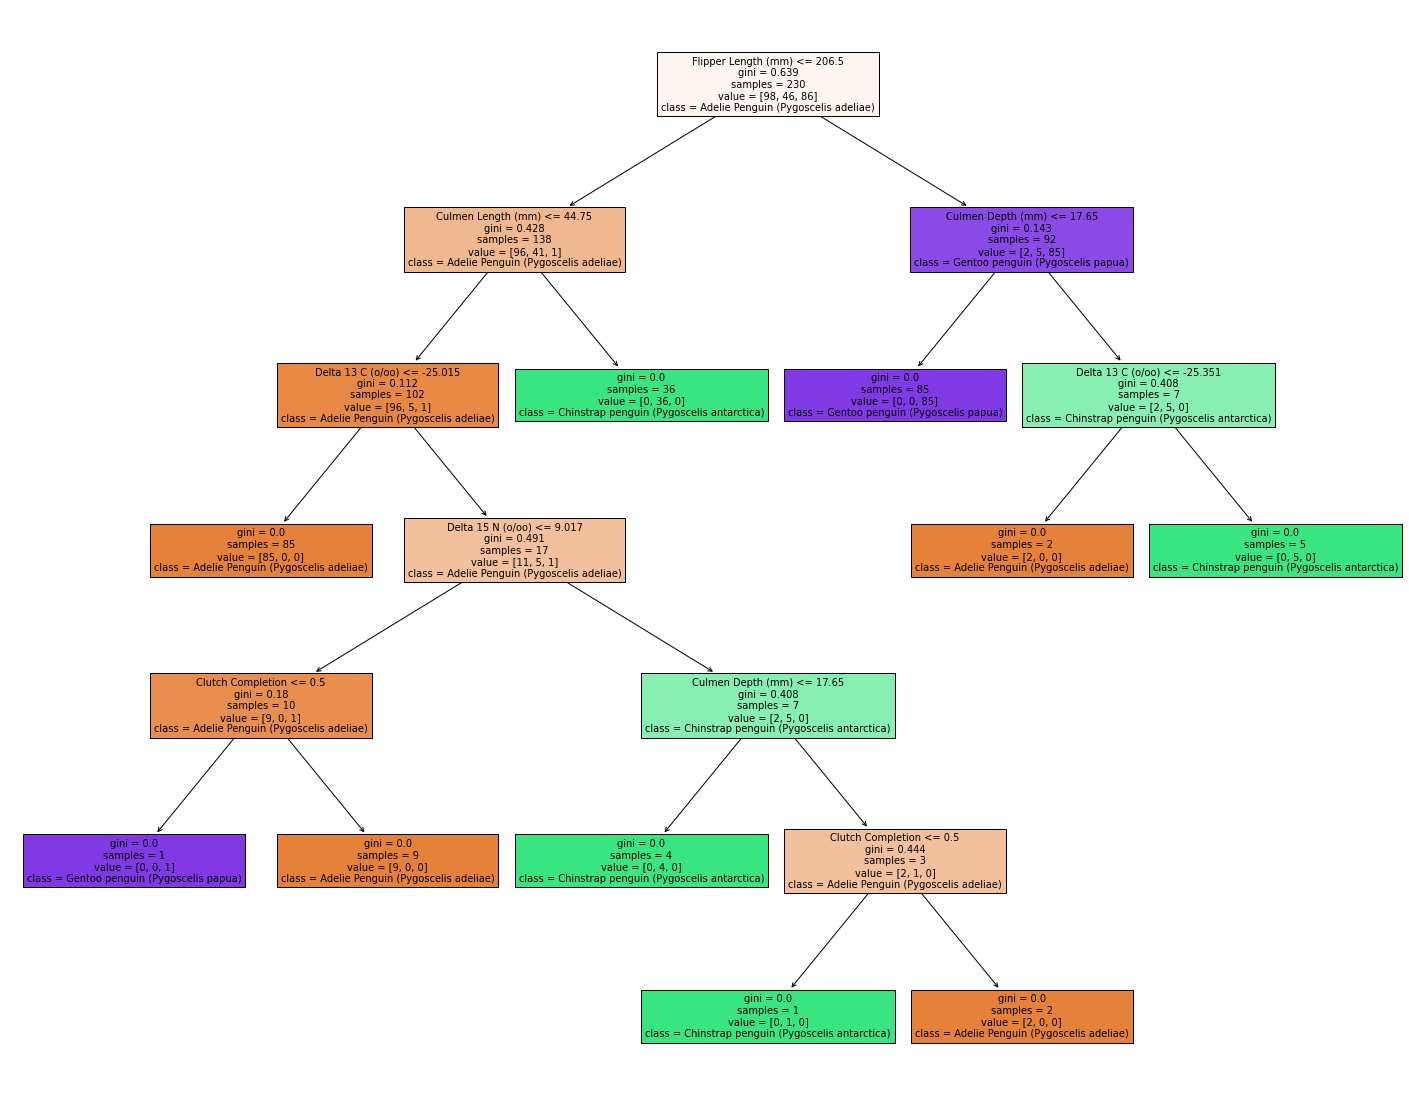

In [21]:
# aqui temos uma imagem com mais informação, 
# olhamos o campo e os valores alem de termos o 
# valor de gini dessa decisão, que aponta para a certesa dessa decisão
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names= clf.feature_names_in_,  
                   class_names=clf.classes_,
                   filled=True)

Text(0.5, 1.0, 'Feature Importance')

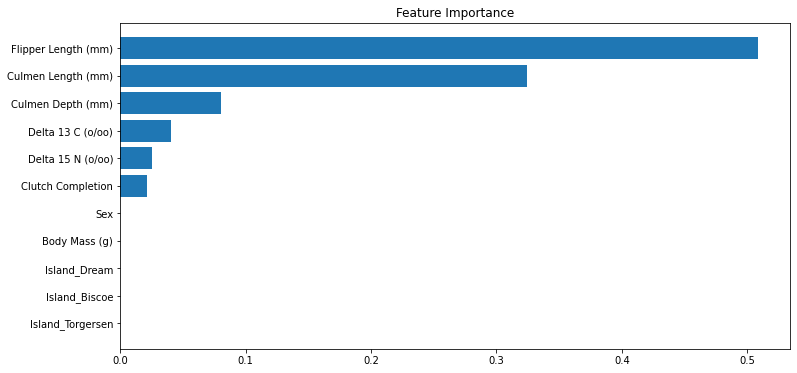

In [41]:

feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Feature Importance')


Text(0.5, 1.0, 'Permutation Importance')

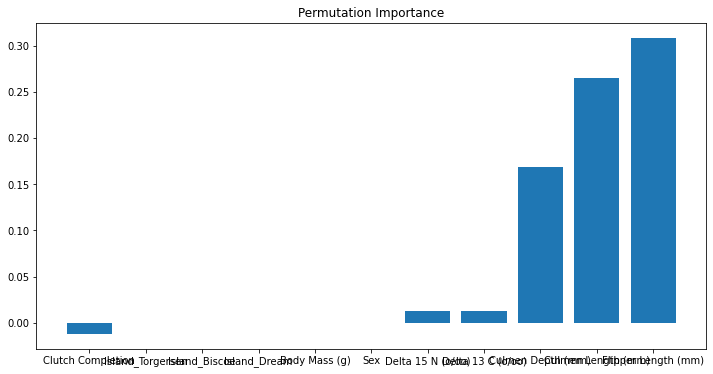

In [59]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(clf, x_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), np.array(x_test.columns)[sorted_idx])
plt.title('Permutation Importance')


percebemos que o modelo da uma importancia maior para flipper lengh, Culmen Length (mm), Culmen Depth (mm),Delta 13 C (o/oo) e basicamente iguinora as outras variaveis 

In [25]:
x_test.columns

Index(['Island', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

# testing decision tree

In [26]:
# passando o mesmo tratamento para os dados de test 
x_test = tratamento(x_test)

In [27]:
# organisa as colunas do mesmo jito que o dataset de treino 
x_test = x_test.loc[:,x_train_tra.columns]
x_test.head()

,Island_Torgersen,Island_Biscoe,Island_Dream,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
194,0,0,1,1,50.9,19.1,196.0,3550.0,0,10.02372,-24.86594
157,0,0,1,1,45.2,17.8,198.0,3950.0,1,8.88942,-24.49433
225,0,1,0,1,46.5,13.5,210.0,4550.0,1,7.99530,-25.32829
208,0,0,1,1,45.2,16.6,191.0,3250.0,1,9.62357,-24.78984
318,0,1,0,1,48.4,14.4,203.0,4625.0,1,8.16582,-26.13971


In [28]:
y_pred = clf.predict(x_test)

apartir das prediçoes do modelo precisamos avaliar a qualidade dessas prediçoes, 
para isso vamos utilizar uma matris de confusão 

/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


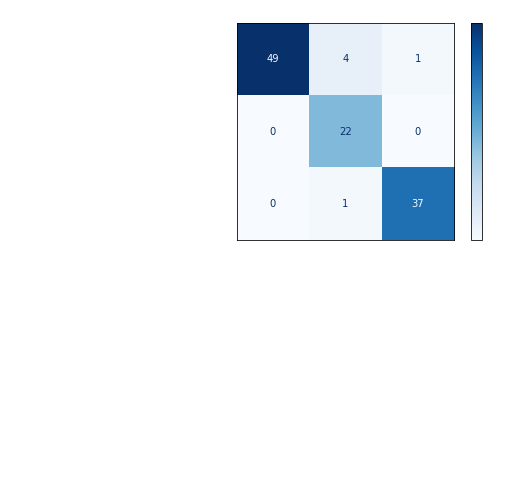

In [29]:

from sklearn import metrics 
color = 'white'
matrix = metrics.plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.xticks(rotation=90)
plt.show()

nesse caso o obijetivo é termos os maiores valores na diagonal do diagrama pois é ai que encontram os verdadeiros verdadeiros.
no caso do nosso modele temos uma boua taxa de acerto do nosso preditor com arvores de clasificação. 
mas podemos olhar algusn indicadores baseados na matris de confusão. 

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.91      0.95        54
Chinstrap penguin (Pygoscelis antarctica)       0.81      1.00      0.90        22
        Gentoo penguin (Pygoscelis papua)       0.97      0.97      0.97        38

                                 accuracy                           0.95       114
                                macro avg       0.93      0.96      0.94       114
                             weighted avg       0.96      0.95      0.95       114



com esse modelo, chegamos a uma acuracia de 0,94 ou seja 94% das nossas prediçoes são corretas. 

esse primeiro modelo parece bom, mas vamos utilizar outros metodos e compararmos os resultados 

## Random Forest

nesse momento vamos utilizar o modelo Random Forest que utiliza a mesma ideia das arvores de decisão, porem em vez de gerar uma arvore, vamos gerar varias arvores a partir de amostras aleatorias do datacet. com essas elegemos qual performa melhor e elegemos ela como a arvore a ser utilizada pelo modelo. 


In [31]:
# instanciando o modelo 

from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(x_train_tra,y_train)

RandomForestClassifier()

In [32]:
# fazendo prediçoes
y_pred = rfc.predict(x_test)

In [33]:
#printando acuracia 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.96      0.98        54
Chinstrap penguin (Pygoscelis antarctica)       0.96      1.00      0.98        22
        Gentoo penguin (Pygoscelis papua)       0.97      1.00      0.99        38

                                 accuracy                           0.98       114
                                macro avg       0.98      0.99      0.98       114
                             weighted avg       0.98      0.98      0.98       114



nesse modelo tivemos uma acuracia melhor, porem estamos muito proximo de uma acuracia de 100% o que pode indicar que estamos overfitting o que pode ser danoso para o nosso modelo. 

[Text(772.2321428571428, 1009.5428571428572, 'Body Mass (g) <= 4537.5\ngini = 0.658\nsamples = 143\nvalue = [92, 61, 77]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(448.3928571428571, 854.2285714285715, 'Flipper Length (mm) <= 186.5\ngini = 0.528\nsamples = 96\nvalue = [91, 60, 8]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(199.28571428571428, 698.9142857142858, 'Culmen Length (mm) <= 44.6\ngini = 0.056\nsamples = 20\nvalue = [34, 1, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(99.64285714285714, 543.6, 'gini = 0.0\nsamples = 19\nvalue = [34, 0, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(298.92857142857144, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap penguin (Pygoscelis antarctica)'),
 Text(697.5, 698.9142857142858, 'Delta 13 C (o/oo) <= -25.023\ngini = 0.558\nsamples = 76\nvalue = [57, 59, 8]\nclass = Chinstrap penguin (Pygoscelis antarctica)'),
 Text(498.21428571428567, 543.6, 'Culmen Length (mm) <= 42.95\ngini =

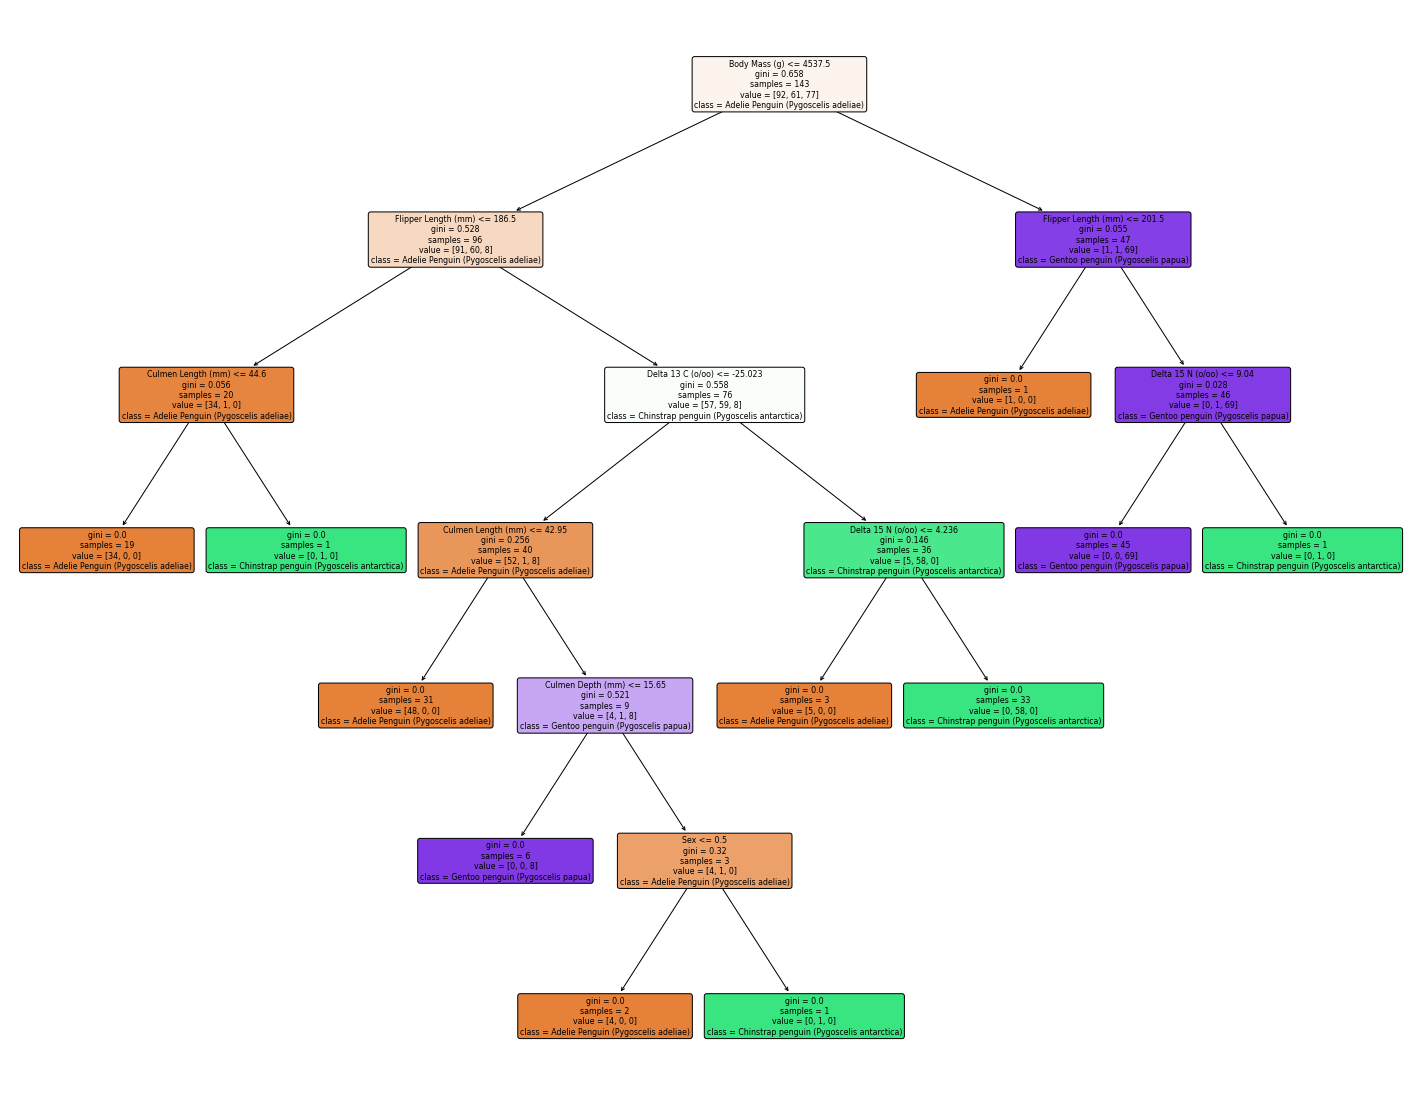

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(rfc.estimators_[0], 
          feature_names=rfc.feature_names_in_,
          class_names=rfc.classes_, 
          filled=True, impurity=True, 
          rounded=True)

In [35]:
import time
import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([rfc.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 1.176 seconds


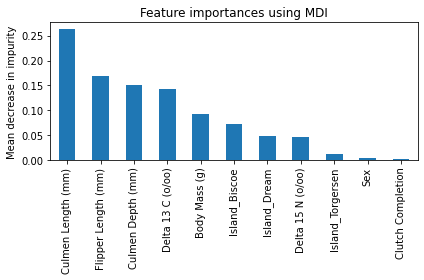

In [53]:

import pandas as pd

forest_importances = pd.Series(importances, index=rfc.feature_names_in_).sort_values(ascending=False)



fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [51]:
forest_importances.head()

Island_Torgersen      0.000000
Island_Biscoe         0.000000
Island_Dream         -0.002632
Clutch Completion     0.000000
Culmen Length (mm)    0.143860
dtype: float64

In [37]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rfc, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=rfc.feature_names_in_)

Elapsed time to compute the importances: 2.884 seconds


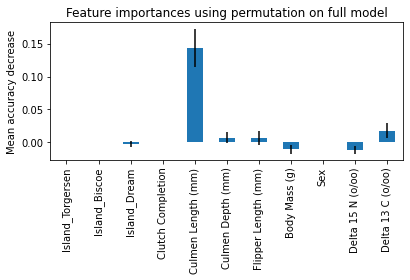

In [38]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

intereçante preceber que nesse modelo temos pesos diferentes para as mesmas variaveis, no caso da RandomForest temos como a primeira variavel da decisão o peso, seguida por delta 15 e delta 13, ja a arvore de decisão da importancia para as variaves fliper lenght e culmen lenght. 
assium chegando a diferentes niveis de acuracia. 

## suport vector machines 


aqui vamos testar suport vector machines, e como elas possuem varios kernels, ou diferentes formas de atuar desse modelo. 

In [39]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

from sklearn import svm

for k in kernel: 
    svmc = svm.SVC(kernel=k)
    svmc.fit(x_train_tra,y_train)
    y_pred = svmc.predict(x_test)
    print("kernel {}, Accuracy:{}".format(k,metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))


kernel linear, Accuracy:0.9912280701754386
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.98      0.99        54
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        22
        Gentoo penguin (Pygoscelis papua)       0.97      1.00      0.99        38

                                 accuracy                           0.99       114
                                macro avg       0.99      0.99      0.99       114
                             weighted avg       0.99      0.99      0.99       114

kernel poly, Accuracy:0.7105263157894737
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.65      0.87      0.75        54
Chinstrap penguin (Pygoscelis antarctica)       0.00      0.00      0.00        22
        Gentoo penguin (Pygoscelis papua)       0.81      0.89      0.85        38

/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/anaconda3/lib/python3.